Plot titrations curves

In [36]:
### python modules
import copy
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats


In [37]:
### custom modules
import graphics_edit as graphics


In [38]:
### matplotlib setting
%matplotlib inline
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"


In [39]:
### custom modules
import load_file_edit as load_file


In [40]:
### data path
path = "./data/titration_data/"


In [41]:
### parameters
agent_unit = {'sp':'mM',
              'spd':'mM',
              'CoH':'mM',
              'PEG':'%',
              'Mg':'mM',
              'Ca':'mM',
              'HP1a':'$\\mu$M',
              'HP1bSUV':'$\\mu$M'}

agent_logbase = {'sp':10,
                 'spd':10,
                 'CoH':10,
                 'PEG':None,
                 'Mg':None,
                 'Ca':None,
                 'HP1a':2,
                 'HP1bSUV':2}

agent_fullname = {'sp':'Spermine(4+)',
                  'spd':'Spermidine(3+)',
                  'CoH':'Cobalt Hexammine(3+)',
                  'PEG':'PEG 8000',
                  'Mg':'Magnesium',
                  'Ca':'Calcium',
                  'HP1a':'HP1$\\alpha$',
                  'HP1bSUV':'HP1$\\beta$/SUV39H1'}

In [42]:
### read titration file
def read_titration (fname):
    conc_list = []
    mean_list = []
    std_list = []
    First = True
    for line in open(fname):
        if First:
            First = False
            continue
        if not line:
            continue
        cols = line.strip().split()
        conc, mean, std = float(cols[0]), float(cols[-3]), float(cols[-2])
        conc_list.append(conc)
        mean_list.append(mean)
        std_list.append(std)
    return conc_list, mean_list, std_list


In [43]:
### plot function
def plot_titration_curve (rexp_list,
                          agent,
                          labels,
                          colors,
                          title=None,
                          figsize=(2.4,1.8),
                          savefig=False):

    fig = plt.figure(figsize=figsize)

    for i in range(len(rexp_list)):
        cell, sample, agent = rexp_list[i]
        fname = path + '_'.join([cell, sample, agent, 'titration']) + '.csv'
        conc_list, mean_list, std_list = read_titration (fname)

        if agent_logbase[agent] != None:
            conc_list = conc_list[1:]
            mean_list = mean_list[1:]
            std_list = std_list[1:]

        label, color = labels[i], colors[i]

        if color.startswith('tab'):
            ecolor = color
        else:
            ecolor = 'tab:' + color

        plt.plot(conc_list,
                 mean_list,
                 'o-',
                 color=color,
                 lw=1.5,
                 markersize=3.5,
                 label=label)
        
        plt.errorbar(conc_list,
                     mean_list,
                     yerr=std_list,
                     fmt='.',
                     markersize=3.5,
                     mfc=color,
                     mec=color,
                     lw=1.5,
                     color=ecolor,
                     alpha=0.8)

    if agent_logbase[agent] != None:
        plt.xscale("log", basex=agent_logbase[agent])

    plt.gca().tick_params(axis='both', which='major', labelsize=5)
    plt.gca().tick_params(axis='both', which='minor', labelsize=5)
    plt.xlabel("%s concentration (%s)" % (agent_fullname[agent], agent_unit[agent]),
               fontsize=8)
    plt.ylabel("Soluble fraction", fontsize=8)
    plt.title(title, fontsize=10)
    plt.legend(fontsize=8)
    if savefig:
        plt.savefig('titration.svg', format='svg', bbox_inches='tight')
    plt.show()
    plt.close()


    

    

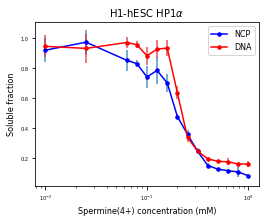

In [44]:
# H1-hESC data
rexp_list = [('H1', 'NCP', 'sp'),
             ('H1', 'DNA', 'sp')]
labels = ['NCP', 'DNA']
colors = ['blue', 'red']
title = "H1-hESC %s" % (agent_fullname[agent])

plot_titration_curve (rexp_list,
                      agent,
                      labels,
                      colors,
                      title,
                      figsize=(4,3))



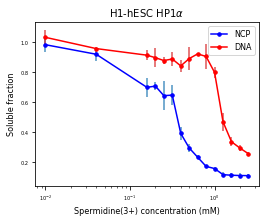

In [45]:
rexp_list = [('H1', 'NCP', 'spd'),
             ('H1', 'DNA', 'spd')]
labels = ['NCP', 'DNA']
colors = ['blue', 'red']
title = "H1-hESC %s" % (agent_fullname[agent])

plot_titration_curve (rexp_list,
                      agent,
                      labels,
                      colors,
                      title,
                      figsize=(4,3))


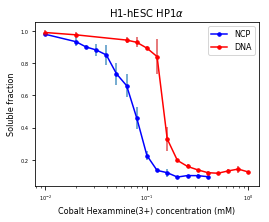

In [46]:
rexp_list = [('H1', 'NCP', 'CoH'),
             ('H1', 'DNA', 'CoH')]
labels = ['NCP', 'DNA']
colors = ['blue', 'red']
title = "H1-hESC %s" % (agent_fullname[agent])

plot_titration_curve (rexp_list,
                      agent,
                      labels,
                      colors,
                      title,
                      figsize=(4,3))


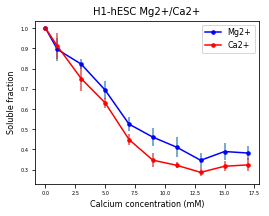

In [47]:
rexp_list = [('H1', 'NCP', 'Mg'),
             ('H1', 'NCP', 'Ca')]
labels = ['Mg2+', 'Ca2+']
colors = ['blue', 'red']
title = "H1-hESC Mg2+/Ca2+"

plot_titration_curve (rexp_list,
                      agent,
                      labels,
                      colors,
                      title,
                      figsize=(4,3))

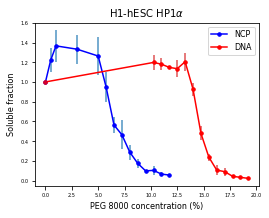

In [48]:
rexp_list = [('H1', 'NCP', 'PEG'),
             ('H1', 'DNA', 'PEG')]
labels = ['NCP', 'DNA']
colors = ['blue', 'red']
title = "H1-hESC %s" % (agent_fullname[agent])

plot_titration_curve (rexp_list,
                      agent,
                      labels,
                      colors,
                      title,
                      figsize=(4,3))


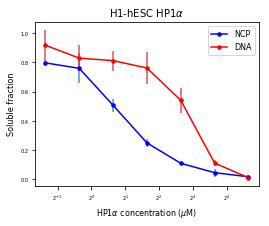

In [49]:
rexp_list = [('H1', 'NCP', 'HP1a'),
             ('H1', 'DNA', 'HP1a')]
labels = ['NCP', 'DNA']
colors = ['blue', 'red']
title = "H1-hESC %s" % (agent_fullname[agent])

plot_titration_curve (rexp_list,
                      agent,
                      labels,
                      colors,
                      title,
                      figsize=(4,3))


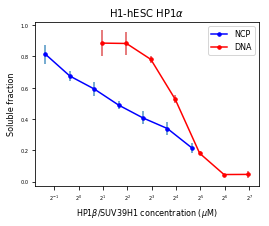

In [50]:
rexp_list = [('H1', 'NCP', 'HP1bSUV'),
             ('H1', 'DNA', 'HP1bSUV')]
labels = ['NCP', 'DNA']
colors = ['blue', 'red']
title = "H1-hESC %s" % (agent_fullname[agent])

plot_titration_curve (rexp_list,
                      agent,
                      labels,
                      colors,
                      title,
                      figsize=(4,3))


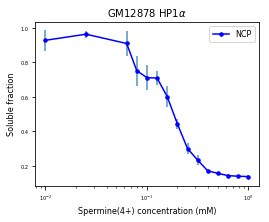

In [51]:
# GM data
rexp_list = [('GM', 'NCP', 'sp')]
labels = ['NCP']
colors = ['blue']
title = "GM12878 %s" % (agent_fullname[agent])

plot_titration_curve (rexp_list,
                      agent,
                      labels,
                      colors,
                      title,
                      figsize=(4,3))


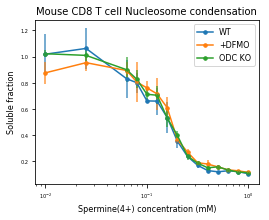

In [52]:
# mouse data
rexp_list = [('mCD8T:WT', 'NCP', 'sp'),
             ('mCD8T:DFMO', 'NCP', 'sp'),
             ('mCD8T:ODCKO', 'NCP', 'sp')]
labels = ['WT', '+DFMO', 'ODC KO']
colors = ['tab:blue', 'tab:orange', 'tab:green']
title = "Mouse CD8 T cell Nucleosome condensation"

plot_titration_curve (rexp_list,
                      agent,
                      labels,
                      colors,
                      title,
                      figsize=(4,3))
                      


In [53]:
### exp list
# mouse data
agent = "sp"
exp_list = [('mCD8T', 'WT-NCP'),
            ('mCD8T', 'inht-NCP'),
            ('mCD8T', 'KO-NCP')]
labels = ['WT', '+inht', 'ODC KO']
colors = ['tab:blue', 'tab:orange', 'tab:green']

title = "Mouse CD8 T cell Nucleosome condensation"

# proteins
agent = 'HP1bSUV'
exp_list = [('H1', 'NCP'),
            ('H1', 'DNA')]
labels = ['NCP', 'DNA']
colors = ['red', 'blue']
title = "H1-hESC %s" % (agent_fullname[agent])


